# LAB 03

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To ignore all the warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
train_data = pd.read_csv('train.csv')
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S


In [10]:
train_data.set_index('PassengerID', inplace = True)
print(train_data['Pclass'])

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int64


In [13]:
print(train_data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [14]:
print(train_data['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [15]:
print(['Age', 'Fare'],": Numeric attributes")
print('Some values of age are:')
print(train_data['Age'][0:3])
print('Some values of Fare are:')
print(train_data['Fare'][0:3])

['Age', 'Fare'] : Numeric attributes
Some values of age are:
PassengerId
1    22.0
2    38.0
3    26.0
Name: Age, dtype: float64
Some values of Fare are:
PassengerId
1     7.2500
2    71.2833
3     7.9250
Name: Fare, dtype: float64


In [17]:
print(train_data['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [27]:
print('Examples of continuous attributes')
print(train_data['Fare'][0:3])
print(train_data['Age'][0:3])
print('Examples of discrete attributes')
print(train_data['Pclass'][0:3])
print(train_data['SibSp'][0:3])
print(train_data['Survived'][0:3])

Examples of continuous attributes
PassengerId
1     7.2500
2    71.2833
3     7.9250
Name: Fare, dtype: float64
PassengerId
1    22.0
2    38.0
3    26.0
Name: Age, dtype: float64
Examples of discrete attributes
PassengerId
1    3
2    1
3    3
Name: Pclass, dtype: int64
PassengerId
1    1
2    1
3    0
Name: SibSp, dtype: int64
PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64


In [32]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [34]:
print(train_data.describe(include='all'))

        PassengerId    Survived      Pclass                 Name Gender  \
count    891.000000  891.000000  891.000000                  891    891   
unique          NaN         NaN         NaN                  891      2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick   male   
freq            NaN         NaN         NaN                    1    577   
mean     446.000000    0.383838    2.308642                  NaN    NaN   
std      257.353842    0.486592    0.836071                  NaN    NaN   
min        1.000000    0.000000    1.000000                  NaN    NaN   
25%      223.500000    0.000000    2.000000                  NaN    NaN   
50%      446.000000    0.000000    3.000000                  NaN    NaN   
75%      668.500000    1.000000    3.000000                  NaN    NaN   
max      891.000000    1.000000    3.000000                  NaN    NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000 

In [38]:
print(train_data.Cabin.describe())
print(train_data['Cabin'].unique())

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47'

In [40]:
print(train_data.Cabin.isnull().sum()/len(train_data)*100)  

77.10437710437711


In [42]:
train_data.Survived.skew()

np.float64(0.4785234382949897)

In [46]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

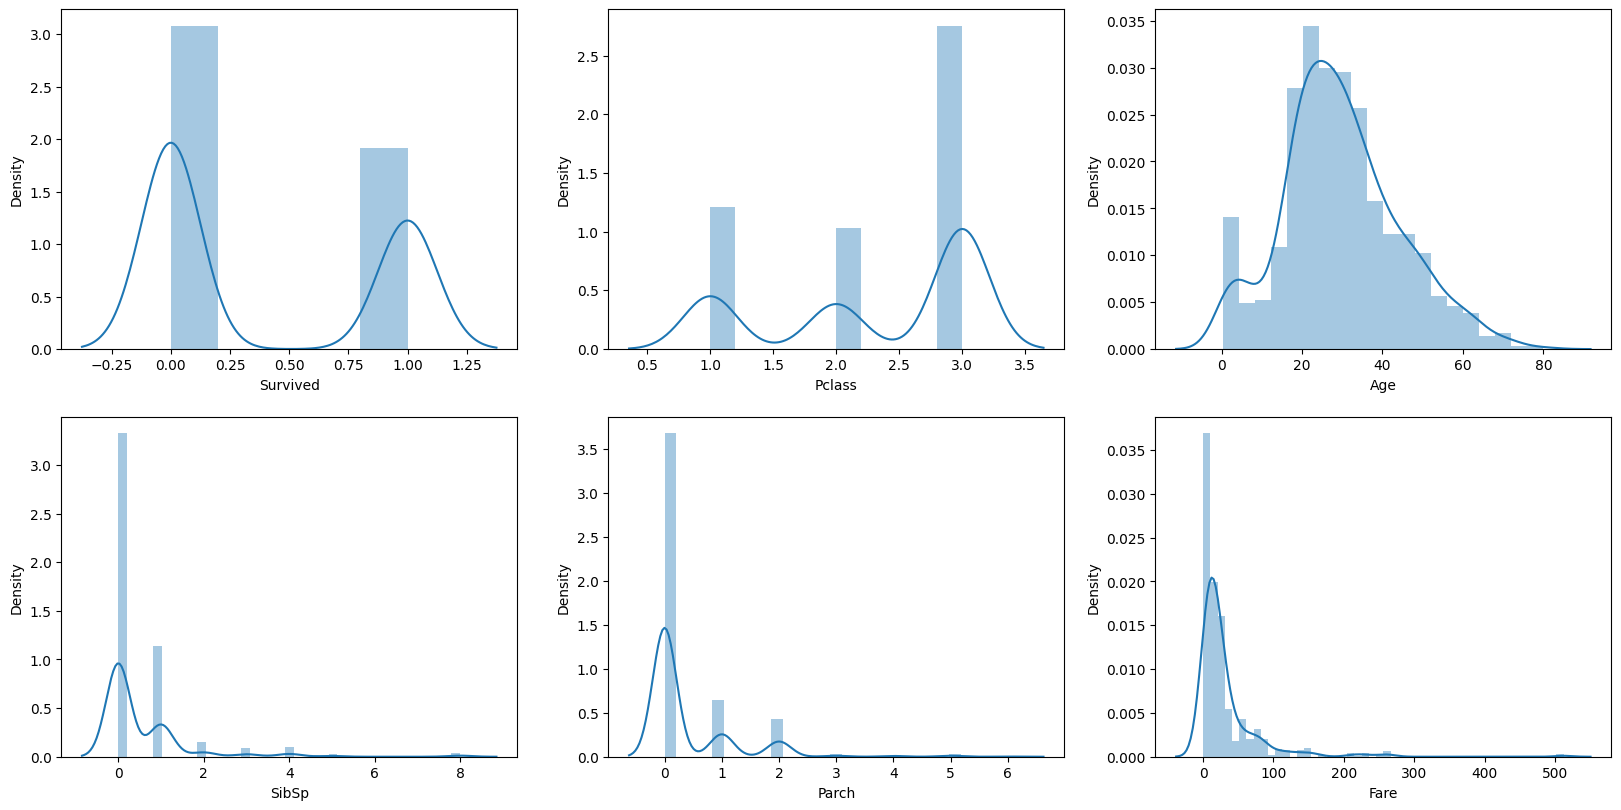

In [51]:
# Plot graphs show skewness of survived, Pclass, Age, SibSp, Parch, Fare
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(train_data['Survived'])
plt.subplot(3,3,2)
sns.distplot(train_data['Pclass'])
plt.subplot(3,3,3)
sns.distplot(train_data['Age'])
plt.subplot(3,3,4)
sns.distplot(train_data['SibSp'])
plt.subplot(3,3,5)
sns.distplot(train_data['Parch'])
plt.subplot(3,3,6)
sns.distplot(train_data['Fare'])
plt.show()






# **22/10/2024**

In [5]:
# Hamming Distance
def hamming_distance(a,b):
    return sum(abs(e1-e2) for e1,e2 in zip(a,b))/len(a)

row1=[0,0,0,0,0,1]
row2=[0,0,0,0,1,0]

dist = hamming_distance(row1, row2)
print(dist)

0.3333333333333333


In [7]:
from scipy.spatial.distance import hamming
a = [0,0,0,1]
b = [1,0,1,1]
dist = hamming(a,b)
print(dist)

0.5


In [18]:
# distance

def calculate_distance(person1, person2):
    p = len(person1)
    m = 0
    
    for attr1, attr2 in zip(person1, person2):
        if attr1 == attr2:
            m = m+1
    
    distance = (p - m) / p
    return distance

ali = ['Blue', 'Cake']
bilal = ['Yellow', 'Cake']
faris = ['Yellow', 'Burger']

print('Distance between Ali and Bilal is:', calculate_distance(ali, bilal))
print('Distance between Ali and Faris is:', calculate_distance(ali, faris))

Distance between Ali and Bilal is: 0.5
Distance between Ali and Faris is: 1.0


In [16]:
# dissimilarities

def calculate_dissimilarity(person1, person2):
    r = s = q = 0 

    for attr1, attr2 in zip(person1, person2):
        if attr1 == "P" and attr2 == "N":
            r = r+1
        elif attr1 == "N" and attr2 == "P":
            s = s+1
        elif attr1 == attr2:
            q = q+1
    
    dissimilarity = (r + s) / (q + r + s)
    return dissimilarity

Jack = ['P', 'N', 'P', 'N', 'N', 'N']
Mary = ['P', 'N', 'P', 'N', 'P', 'N']
Jim = ['P', 'P', 'N', 'N', 'N', 'N']

# Calculate dissimilarities
dissimilarity_jack_mary = calculate_dissimilarity(Jack, Mary)
dissimilarity_jack_jim = calculate_dissimilarity(Jack, Jim)
dissimilarity_mary_jim = calculate_dissimilarity(Mary, Jim)

# Output the results
print(f"Dissimilarity between Jack and Mary: {dissimilarity_jack_mary}")
print(f"Dissimilarity between Jack and Jim: {dissimilarity_jack_jim}")
print(f"Dissimilarity between Mary and Jim: {dissimilarity_mary_jim}")

Dissimilarity between Jack and Mary: 0.16666666666666666
Dissimilarity between Jack and Jim: 0.3333333333333333
Dissimilarity between Mary and Jim: 0.5
